In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import folium
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:\Users\bbrun\Google Drive\Uber\Analytics_Exercise_Data_(1).xlsx')

In [3]:
df.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,431032,1648,2014-08-29 15:33:00,Steuart at Market,74,2014-08-29 16:00:00,San Francisco Caltrain (Townsend at 4th),70,411,Subscriber,94107
1,383548,617,2014-07-28 17:35:00,Steuart at Market,74,2014-07-28 17:45:00,San Francisco Caltrain (Townsend at 4th),70,259,Subscriber,94403
2,257887,551,2014-04-22 19:19:00,Post at Kearny,47,2014-04-22 19:28:00,South Van Ness at Market,66,414,Subscriber,94105
3,334581,327,2014-06-22 19:36:00,5th at Howard,57,2014-06-22 19:42:00,2nd at Folsom,62,553,Subscriber,94103
4,268757,382,2014-05-01 19:37:00,Clay at Battery,41,2014-05-01 19:44:00,Market at 4th,76,501,Subscriber,94612


In [4]:
df.tail()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
90226,216465,1178,2014-03-17 08:54:00,Townsend at 7th,65,2014-03-17 09:14:00,Embarcadero at Vallejo,48,478,Subscriber,94107
90227,290969,120,2014-05-20 08:34:00,Steuart at Market,74,2014-05-20 08:36:00,Embarcadero at Folsom,51,422,Subscriber,94044
90228,324829,1807,2014-06-15 12:08:00,San Francisco Caltrain 2 (330 Townsend),69,2014-06-15 12:38:00,Embarcadero at Vallejo,48,379,Customer,94041
90229,266083,522,2014-04-30 08:35:00,Davis at Jackson,42,2014-04-30 08:44:00,Market at 4th,76,347,Subscriber,94111
90230,367598,255,2014-07-17 08:22:00,Commercial at Montgomery,45,2014-07-17 08:26:00,Temporary Transbay Terminal (Howard at Beale),55,592,Subscriber,94939


In [5]:
df.columns

Index(['Trip ID', 'Duration', 'Start Date', 'Start Station', 'Start Terminal',
       'End Date', 'End Station', 'End Terminal', 'Bike #', 'Subscriber Type',
       'Zip Code'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90231 entries, 0 to 90230
Data columns (total 11 columns):
Trip ID            90231 non-null object
Duration           90231 non-null int64
Start Date         90231 non-null datetime64[ns]
Start Station      90231 non-null object
Start Terminal     90231 non-null int64
End Date           90231 non-null datetime64[ns]
End Station        90231 non-null object
End Terminal       90231 non-null int64
Bike #             90231 non-null int64
Subscriber Type    90231 non-null object
Zip Code           90129 non-null object
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 7.6+ MB


In [7]:
df = df.astype({'Start Terminal': object, 'End Terminal': object, 'Bike #': object})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90231 entries, 0 to 90230
Data columns (total 11 columns):
Trip ID            90231 non-null object
Duration           90231 non-null int64
Start Date         90231 non-null datetime64[ns]
Start Station      90231 non-null object
Start Terminal     90231 non-null object
End Date           90231 non-null datetime64[ns]
End Station        90231 non-null object
End Terminal       90231 non-null object
Bike #             90231 non-null object
Subscriber Type    90231 non-null object
Zip Code           90129 non-null object
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 7.6+ MB


In [8]:
df['Duration_m'] = df['Duration'].apply(lambda x: x/60)

In [9]:
columns_list = df.columns.tolist()
columns_list

['Trip ID',
 'Duration',
 'Start Date',
 'Start Station',
 'Start Terminal',
 'End Date',
 'End Station',
 'End Terminal',
 'Bike #',
 'Subscriber Type',
 'Zip Code',
 'Duration_m']

In [10]:
columns_list_new_order = ['Trip ID',
 'Duration',
 'Duration_m',
 'Start Date',
 'Start Station',
 'Start Terminal',
 'End Date',
 'End Station',
 'End Terminal',
 'Bike #',
 'Subscriber Type',
 'Zip Code']

In [11]:
df2 = df[columns_list_new_order]

In [12]:
df2.head()

,Trip ID,Duration,Duration_m,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,431032,1648,27.466667,2014-08-29 15:33:00,Steuart at Market,74,2014-08-29 16:00:00,San Francisco Caltrain (Townsend at 4th),70,411,Subscriber,94107
1,383548,617,10.283333,2014-07-28 17:35:00,Steuart at Market,74,2014-07-28 17:45:00,San Francisco Caltrain (Townsend at 4th),70,259,Subscriber,94403
2,257887,551,9.183333,2014-04-22 19:19:00,Post at Kearny,47,2014-04-22 19:28:00,South Van Ness at Market,66,414,Subscriber,94105
3,334581,327,5.450000,2014-06-22 19:36:00,5th at Howard,57,2014-06-22 19:42:00,2nd at Folsom,62,553,Subscriber,94103
4,268757,382,6.366667,2014-05-01 19:37:00,Clay at Battery,41,2014-05-01 19:44:00,Market at 4th,76,501,Subscriber,94612


In [13]:
df['Start Station'].value_counts()

San Francisco Caltrain (Townsend at 4th)         6858
Harry Bridges Plaza (Ferry Building)             4382
San Francisco Caltrain 2 (330 Townsend)          3728
Embarcadero at Sansome                           3670
2nd at Townsend                                  3631
Market at Sansome                                3510
Temporary Transbay Terminal (Howard at Beale)    3386
Steuart at Market                                3344
Market at 4th                                    2788
Townsend at 7th                                  2767
Market at 10th                                   2606
Powell Street BART                               2539
2nd at South Park                                2411
Beale at Market                                  2252
2nd at Folsom                                    2215
Grant Avenue at Columbus Avenue                  2096
Embarcadero at Bryant                            2008
Embarcadero at Folsom                            1824
South Van Ness at Market    

(array([36., 17.,  9.,  6.,  1.,  0.,  1.]),
 array([   0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]),
 <a list of 7 Patch objects>)

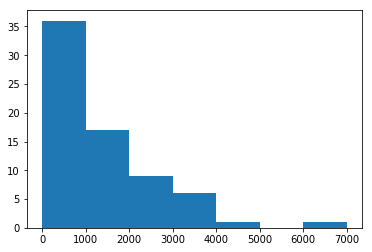

In [14]:
hist = df['Start Station'].value_counts()
bins = np.arange(0, 8000, 1000)
plt.hist(hist, bins=bins)

In [15]:
df['Start Station'].describe()

count                                        90231
unique                                          70
top       San Francisco Caltrain (Townsend at 4th)
freq                                          6858
Name: Start Station, dtype: object

In [16]:
df['Subscriber Type'].value_counts(normalize=True)

Subscriber    0.832452
Customer      0.167548
Name: Subscriber Type, dtype: float64

In [17]:
df2.Duration_m.describe()

count    90231.000000
mean        18.693353
std         84.560786
min          1.000000
25%          5.750000
50%          8.633333
75%         12.666667
max       5815.166667
Name: Duration_m, dtype: float64

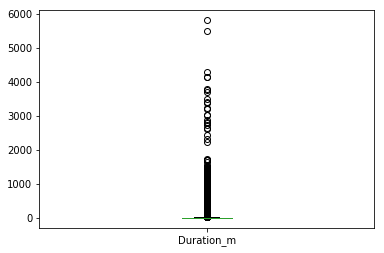

In [18]:
df2.plot(y='Duration_m', kind='box')

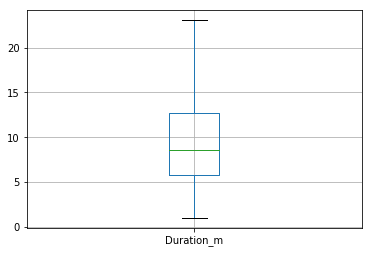

In [19]:
df2.plot(y='Duration_m', kind='box', showfliers=False, grid=True)

In [20]:
month_x_trips = df2.groupby(df2['Start Date'].dt.month)['Trip ID'].count()
month_x_trips

Start Date
3    12970
4    13839
5    14882
6    15800
7    16526
8    16214
Name: Trip ID, dtype: int64

[Text(0, 0.5, 'Trips'),
 [Text(0, 0, 'Mar'),
  Text(0, 0, 'Apr'),
  Text(0, 0, 'May'),
  Text(0, 0, 'Jun'),
  Text(0, 0, 'Jul'),
  Text(0, 0, 'Aug')]]

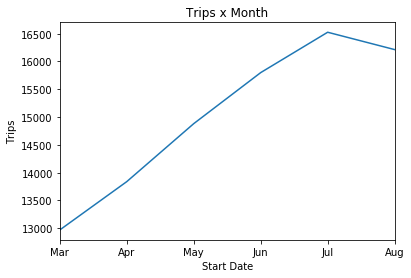

In [21]:
ax = month_x_trips.plot(kind='line', title='Trips x Month', xticks=month_x_trips.index, rot=360)
ax.set(xticklabels=['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'], ylabel=("Trips"))

In [22]:
Trips_x_Day = df2.groupby(df['Start Date'].dt.date)['Trip ID'].count()
Trips_x_Day1 = Trips_x_Day.reset_index()
Trips_x_Day1.columns = ['Date', 'Trips']
Trips_x_Day1['Date'] = pd.to_datetime(Trips_x_Day1['Date'])
Trips_x_Day1['Day_of_week'] = Trips_x_Day1['Date'].dt.dayofweek
Trips_x_Day1

,Date,Trips,Day_of_week
0,2014-03-01,165,5
1,2014-03-02,108,6
2,2014-03-03,391,0
3,2014-03-04,495,1
4,2014-03-05,525,2
5,2014-03-06,521,3
6,2014-03-07,520,4
7,2014-03-08,267,5
8,2014-03-09,301,6
9,2014-03-10,534,0


In [46]:
Trips_x_Day3 = Trips_x_Day1.copy()

for i,r in Trips_x_Day3.iterrows():
    if (Trips_x_Day3.loc[i, 'Day_of_week'] == 5) | (Trips_x_Day3.loc[i, 'Day_of_week'] == 6):
        Trips_x_Day3.loc[i, 'Trips'] = r['Trips']
    else:
        Trips_x_Day3.loc[i, 'Trips'] = 0
print(Trips_x_Day3)


          Date  Trips  Day_of_week
0   2014-03-01    165            5
1   2014-03-02    108            6
2   2014-03-03      0            0
3   2014-03-04      0            1
4   2014-03-05      0            2
5   2014-03-06      0            3
6   2014-03-07      0            4
7   2014-03-08    267            5
8   2014-03-09    301            6
9   2014-03-10      0            0
10  2014-03-11      0            1
11  2014-03-12      0            2
12  2014-03-13      0            3
13  2014-03-14      0            4
14  2014-03-15    260            5
15  2014-03-16    231            6
16  2014-03-17      0            0
17  2014-03-18      0            1
18  2014-03-19      0            2
19  2014-03-20      0            3
20  2014-03-21      0            4
21  2014-03-22    236            5
22  2014-03-23    201            6
23  2014-03-24      0            0
24  2014-03-25      0            1
25  2014-03-26      0            2
26  2014-03-27      0            3
27  2014-03-28      

In [25]:
Trips_x_Day1_aux = Trips_x_Day1.copy()
Trips_x_Day1_aux['Day'] = Trips_x_Day1_aux['Date'].dt.day
Trips_x_Day1_aux = Trips_x_Day1_aux[Trips_x_Day1_aux['Day']==1]
Trips_x_Day1_aux

,Date,Trips,Day_of_week,Day
0,2014-03-01,165,5,1
31,2014-04-01,269,1,1
61,2014-05-01,627,3,1
92,2014-06-01,258,6,1
122,2014-07-01,655,1,1
153,2014-08-01,606,4,1


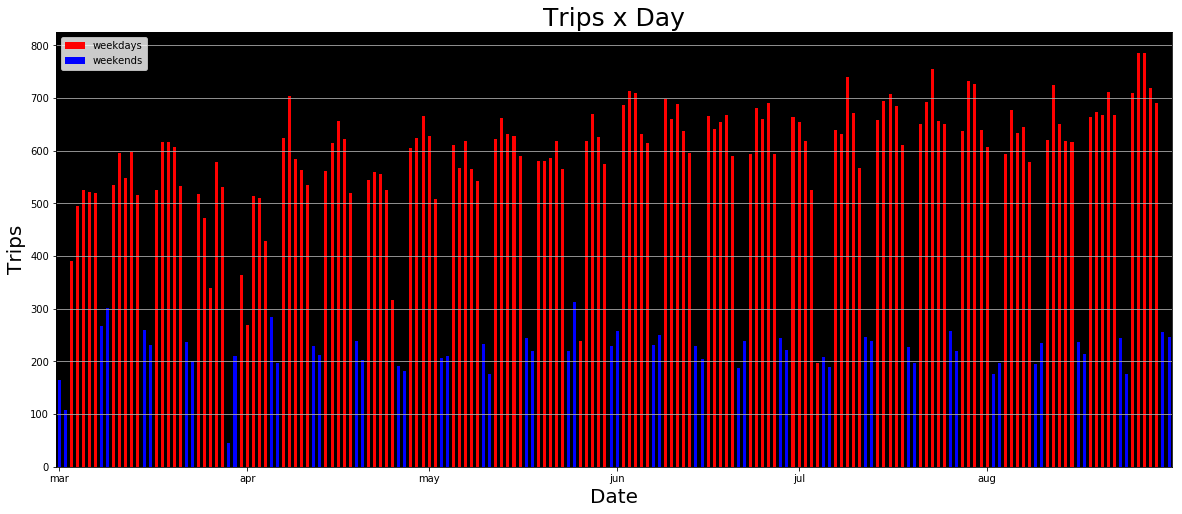

In [45]:
ax = Trips_x_Day1.plot(x='Date', y='Trips', kind='bar', figsize=(20,8), color='red')
ax1 = Trips_x_Day3.plot(x='Date', y='Trips', kind='bar', figsize=(20,8), ax=ax, color='blue')

ax.set_xticks([0,31,61,92,122,153]) 
ax.set_xticklabels(['mar', 'apr', 'may', 'jun', 'jul', 'aug'], rotation='horizontal')
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Trips', fontsize=20)
ax.set_title('Trips x Day', fontsize=25)
ax.legend(['weekdays', 'weekends'])
ax.set_facecolor('black')
ax.grid(axis='y')



In [62]:
table = df2[['Trip ID', 'Start Date']].copy()
table['Day_of_week'] = table['Start Date'].dt.day_name(locale = 'English')
sorting = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
table['Day_of_week'] = pd.Categorical(table['Day_of_week'], sorting)
table['Hour'] = table['Start Date'].dt.hour
table.drop('Start Date', axis=1, inplace=True)
pivot = pd.pivot_table(table, values='Trip ID', index=['Day_of_week'],columns=['Hour'], aggfunc='count')
pivot

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_of_week,,,,,,,,,,,,,,,,,,,,,
Monday,9,10,6,4,7,87,348,1182,2180,1554,...,440,572,1300,2143,1467,786,378,268,117,62
Tuesday,26,10,6,2,9,100,393,1302,2332,1530,...,461,594,1329,2162,1605,820,456,302,217,80
Wednesday,29,20,6,4,12,101,385,1215,2264,1597,...,505,666,1410,2169,1684,842,477,261,196,81
Thursday,37,20,13,1,10,97,358,1202,2299,1537,...,542,752,1337,1995,1472,706,384,236,158,119
Friday,37,19,8,4,11,72,289,918,1870,1405,...,585,796,1293,1696,1143,582,279,207,181,106
Saturday,60,33,21,5,12,6,30,81,204,314,...,487,516,560,421,434,252,187,123,115,79
Sunday,62,34,26,12,6,26,37,55,121,251,...,577,543,570,473,390,297,188,91,81,43


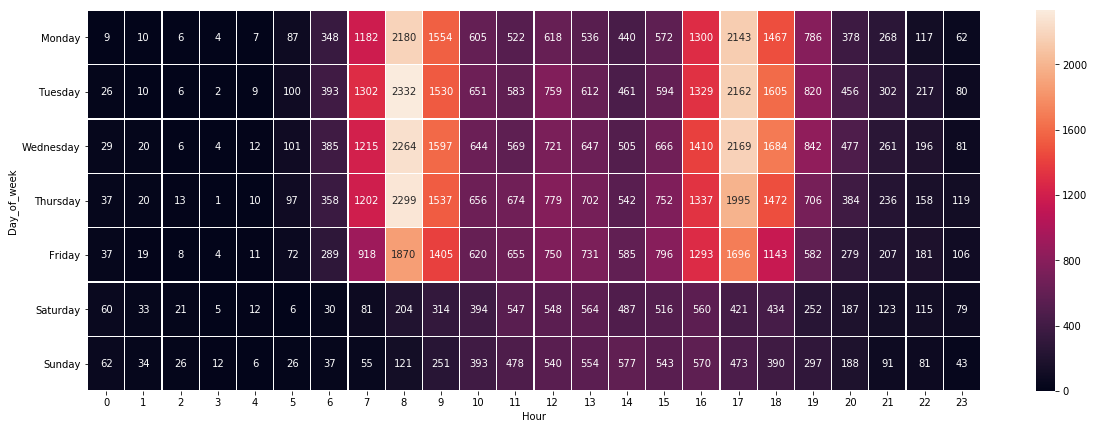

In [74]:
fig, ax = plt.subplots(figsize=(20,7))
heat = sns.heatmap(pivot, annot=True, fmt='d', linewidths=0.20, ax=ax)

In [29]:
station_df.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [30]:
start_station_info = station_df[["id","lat","long"]]
start_station_info.columns = ["start_station_id","start_lat","start_long"]
end_station_info = station_df[["id","lat","long"]]
end_station_info.columns = ["end_station_id","end_lat","end_long"]
df = df.merge(start_station_info,left_on="Start Terminal",right_on="start_station_id")
df = df.merge(end_station_info,left_on="End Terminal",right_on="end_station_id")
df.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,Duration_m,start_station_id,start_lat,start_long,end_station_id,end_lat,end_long
0,431032,1648,2014-08-29 15:33:00,Steuart at Market,74,2014-08-29 16:00:00,San Francisco Caltrain (Townsend at 4th),70,411,Subscriber,94107,27.466667,74,37.794139,-122.394434,70,37.776617,-122.39526
1,383548,617,2014-07-28 17:35:00,Steuart at Market,74,2014-07-28 17:45:00,San Francisco Caltrain (Townsend at 4th),70,259,Subscriber,94403,10.283333,74,37.794139,-122.394434,70,37.776617,-122.39526
2,236762,606,2014-04-04 15:48:00,Steuart at Market,74,2014-04-04 15:58:00,San Francisco Caltrain (Townsend at 4th),70,541,Subscriber,94403,10.100000,74,37.794139,-122.394434,70,37.776617,-122.39526
3,216276,600,2014-03-17 07:39:00,Steuart at Market,74,2014-03-17 07:49:00,San Francisco Caltrain (Townsend at 4th),70,342,Subscriber,94610,10.000000,74,37.794139,-122.394434,70,37.776617,-122.39526
4,311112,667,2014-06-04 17:57:00,Steuart at Market,74,2014-06-04 18:09:00,San Francisco Caltrain (Townsend at 4th),70,509,Subscriber,94024,11.116667,74,37.794139,-122.394434,70,37.776617,-122.39526


In [31]:
columns_list = df.columns.tolist()
columns_list

['Trip ID',
 'Duration',
 'Start Date',
 'Start Station',
 'Start Terminal',
 'End Date',
 'End Station',
 'End Terminal',
 'Bike #',
 'Subscriber Type',
 'Zip Code',
 'Duration_m',
 'start_station_id',
 'start_lat',
 'start_long',
 'end_station_id',
 'end_lat',
 'end_long']

In [32]:
df.columns = ['Trip ID',
 'Duration',
 'Start Date',
 'Start Station',
 'Start Terminal',
 'End Date',
 'End Station',
 'End Terminal',
 'Bike #',
 'Subscriber Type',
 'Zip Code',
 'Duration_m',
 'start_station_id',
 'start_lat',
 'start_long',
 'end_station_id',
 'end_lat',
 'end_long',
]
df.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,Duration_m,start_station_id,start_lat,start_long,end_station_id,end_lat,end_long
0,431032,1648,2014-08-29 15:33:00,Steuart at Market,74,2014-08-29 16:00:00,San Francisco Caltrain (Townsend at 4th),70,411,Subscriber,94107,27.466667,74,37.794139,-122.394434,70,37.776617,-122.39526
1,383548,617,2014-07-28 17:35:00,Steuart at Market,74,2014-07-28 17:45:00,San Francisco Caltrain (Townsend at 4th),70,259,Subscriber,94403,10.283333,74,37.794139,-122.394434,70,37.776617,-122.39526
2,236762,606,2014-04-04 15:48:00,Steuart at Market,74,2014-04-04 15:58:00,San Francisco Caltrain (Townsend at 4th),70,541,Subscriber,94403,10.100000,74,37.794139,-122.394434,70,37.776617,-122.39526
3,216276,600,2014-03-17 07:39:00,Steuart at Market,74,2014-03-17 07:49:00,San Francisco Caltrain (Townsend at 4th),70,342,Subscriber,94610,10.000000,74,37.794139,-122.394434,70,37.776617,-122.39526
4,311112,667,2014-06-04 17:57:00,Steuart at Market,74,2014-06-04 18:09:00,San Francisco Caltrain (Townsend at 4th),70,509,Subscriber,94024,11.116667,74,37.794139,-122.394434,70,37.776617,-122.39526


In [33]:
plot_dict = dict()
for index,row in df.iterrows():
    start_lat = row['start_lat']
    start_long = row['start_long']
    end_lat = row['end_lat']
    end_long = row['end_long']
    key = str(start_lat)+'_'+str(start_long)+'_'+str(end_lat)+'_'+str(end_long)
    if key in plot_dict:
        plot_dict[key] += 1
    else:
        plot_dict[key] = 1
plot_dict

{'37.794139_-122.394434_37.776617_-122.39526': 528,
 '37.788975_-122.403452_37.776617_-122.39526': 79,
 '37.781752_-122.405127_37.776617_-122.39526': 412,
 '37.795001_-122.39997_37.776617_-122.39526': 195,
 '37.776617_-122.39526_37.776617_-122.39526': 81,
 '37.799953_-122.398525_37.776617_-122.39526': 188,
 '37.795392_-122.394203_37.776617_-122.39526': 314,
 '37.79146400000001_-122.391034_37.776617_-122.39526': 476,
 '37.7766_-122.39547_37.776617_-122.39526': 17,
 '37.782259_-122.392738_37.776617_-122.39526': 218,
 '37.776619_-122.417385_37.776617_-122.39526': 502,
 '37.78697800000001_-122.398108_37.776617_-122.39526': 319,
 '37.792251_-122.39708600000002_37.776617_-122.39526': 266,
 '37.78387100000001_-122.408433_37.776617_-122.39526': 334,
 '37.789756_-122.394643_37.776617_-122.39526': 413,
 '37.781332_-122.418603_37.776617_-122.39526': 116,
 '37.789625_-122.400811_37.776617_-122.39526': 398,
 '37.7913_-122.399051_37.776617_-122.39526': 135,
 '37.798541_-122.40086200000002_37.776617_

In [34]:
start_lat = []
start_long = []
end_lat = []
end_long = []
nb_trips = []
for key,value in plot_dict.items():
    start_lat.append(float(key.split('_')[0]))
    start_long.append(float(key.split('_')[1]))
    end_lat.append(float(key.split('_')[2]))
    end_long.append(float(key.split('_')[3]))
    nb_trips.append(int(value))


In [35]:
temp_df = pd.DataFrame({"start_lat":start_lat,"start_long":start_long,"end_lat":end_lat,"end_long":end_long,"nb_trips":nb_trips})
temp_df.head(20)

,start_lat,start_long,end_lat,end_long,nb_trips
0,37.794139,-122.394434,37.776617,-122.39526,528
1,37.788975,-122.403452,37.776617,-122.39526,79
2,37.781752,-122.405127,37.776617,-122.39526,412
3,37.795001,-122.399970,37.776617,-122.39526,195
4,37.776617,-122.395260,37.776617,-122.39526,81
5,37.799953,-122.398525,37.776617,-122.39526,188
6,37.795392,-122.394203,37.776617,-122.39526,314
7,37.791464,-122.391034,37.776617,-122.39526,476
8,37.776600,-122.395470,37.776617,-122.39526,17
9,37.782259,-122.392738,37.776617,-122.39526,218


In [36]:
ave_lat = (temp_df.start_lat.median()+temp_df.end_lat.median())/2
ave_lon = (temp_df.start_long.median()+temp_df.end_long.median())/2
directions_map = folium.Map(location=[ave_lat, ave_lon], zoom_start=15)

In [37]:
for index,row in temp_df.iterrows():
    points = []
    points.append(tuple([row['start_lat'],row['start_long']]))
    points.append(tuple([row['end_lat'],row['end_long']]))
    folium.PolyLine(points,color='red',weight=row['nb_trips']/300).add_to(directions_map)

In [38]:
for index,row in station_df.iterrows():
    folium.Marker([float(row['lat']),float(row['long'])],popup=row['name']).add_to(directions_map)

In [39]:
directions_map